The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing a single subject/person. Each file is a recording of brain activity for 23.6 seconds. The corresponding time-series is sampled into 4097 data points. Each data point is the value of the EEG recording at a different point in time. So we have total 500 individuals with each has 4097 data points for 23.5 seconds.

We divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time. So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

The response variable is y in column 179, the Explanatory variables X1, X2, ..., X178

y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity

All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure. Our motivation for creating this version of the data was to simplify access to the data via the creation of a .csv version of it.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
data = pd.read_csv('jupyter/epilepsy.csv')
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
sum(data.isnull().sum())

0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [5]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [6]:
dataset = data.copy()
dataset.drop('Unnamed', axis=1, inplace=True)
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [7]:
dataset['y'].value_counts()

5    2300
4    2300
3    2300
2    2300
1    2300
Name: y, dtype: int64

In [8]:
dataset.replace([2,3,4,5], 0, inplace=True)
dataset['y'].value_counts()

0    9200
1    2300
Name: y, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

grid_params = {'n_estimators': [5,10,100,1000],
              'max_depth': [5,10,15,20]}


grid_search = GridSearchCV(RandomForestClassifier(), grid_params, cv=5)
grid_search.fit(X_trainval, y_trainval)

print("Trainval set score: {:.3f}%".format(grid_search.score(X_trainval, y_trainval)*100))
print("Test set score: {:.3f}%".format(grid_search.score(X_test, y_test)*100))
print("Best parameters: {}".format(grid_search.best_params_))

Trainval set score: 99.565%
Test set score: 97.696%
Best parameters: {'max_depth': 20, 'n_estimators': 1000}


Text(33.0, 0.5, 'max_depth')

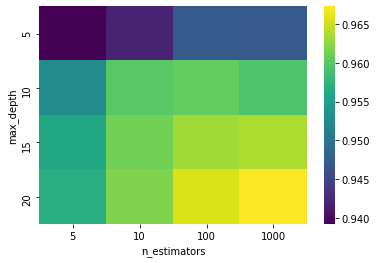

In [20]:
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(4,4)
sns.heatmap(scores,  xticklabels=grid_params['n_estimators'],
            yticklabels=grid_params['max_depth'], cmap='viridis')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')

Support Vector Machine

In [12]:
from sklearn.svm import SVC

param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100]}

pipe_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

grid = GridSearchCV(pipe_svc, param_grid=param_grid, cv=5)
grid.fit(X_trainval, y_trainval)


print("Best cross-validation accuracy: {:.3f}%".format(grid.best_score_*100))
print("Test set score: {:.3f}%".format(grid.score(X_test, y_test)*100))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 97.511%
Test set score: 98.304%
Best parameters: {'svc__C': 10}


Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

pipe_log = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])

param_grid = {'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(pipe_log, param_grid=param_grid, cv=5)
grid.fit(X_trainval, y_trainval)
print("Best cross-validation accuracy: {:.3f}%".format(grid.best_score_*100))
print("Test set score: {:.3f}%".format(grid.score(X_test, y_test)*100))
print("Best parameter: {}".format(grid.best_params_))

Best cross-validation accuracy: 82.446%
Test set score: 82.130%
Best parameter: {'log_reg__C': 100}


K Neighbors Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'knn__n_neighbors': [2,4,8,12,16,20,32]}
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

grid = GridSearchCV(pipe_knn, param_grid=param_grid, cv=5)
grid.fit(X_trainval, y_trainval)
print("Best cross-validation accuracy: {:.3f}%".format(grid.best_score_*100))
print("Test set score: {:.3f}%".format(grid.score(X_test, y_test)*100))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 91.707%
Test set score: 92.261%
Best parameters: {'knn__n_neighbors': 2}


In [ ]:

import warnings
warnings.filterwarnings(action='once')

Voting Classifier

In [ ]:
fdsfdsa

from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth=20)
svc = SVC(C=10, probability=True)
knn = KNeighborsClassifier(n_neighbors = 2)

voting_classifier = VotingClassifier(
    estimators=[('forest', forest), ('svc', svc), ('knn', knn)],
    voting='soft'
)

voting_classifier.fit(X_trainval, y_trainval)

print("Score of voting classifier on traivalset: {:.3f}%".format(voting_classifier.score(X_trainval, y_trainval)*100))
print("Score on test set: {:.3f}%".format(voting_classifier.score(X_test, y_test)*100))


import warnings
warnings.filterwarnings(action='once')

In hard voting:

Score of voting classifier on traivalset: 99.576%

Score on test set: 92.000%

In soft voting:

Score of voting classifier on traivalset: 94.946%

Score on test set: 93.8%